## Regression Machine Learning Case Study 

Aiming to learn:
- work through regression predictive modelling problem
- use data transforms to improve model performance
- use algorithm tuning to model performance
- use ensemble methods

### Problem Definition
Investigate using the Boston House Price dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970, the attributes are:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s dollars

Input attributes have a variety of units

### Load the dataset

In [123]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
#reference the names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

### Analyse the data

In [125]:
X = boston.data
Y = boston.target

df1 = pd.DataFrame(X, columns=names[:-1])
#df.reset_index(drop=True, inplace=True)
df2 = pd.DataFrame(Y, columns=names[-1:])
#df2.reset_index(drop=True, inplace=True)

In [126]:
#look at the datatypes for features and target
print(df1.dtypes,df2.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object MEDV    float64
dtype: object


In [127]:
#lets look at the data
df = pd.concat([df1, df2], axis=1)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0.0,0.46,6.43,58.7,6.06,3.0,222.0,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0.0,0.52,6.01,66.6,5.56,5.0,311.0,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0.0,0.52,6.17,96.1,5.95,5.0,311.0,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0.0,0.52,5.63,100.0,6.08,5.0,311.0,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0.0,0.52,6.00,85.9,6.59,5.0,311.0,15.2,386.71,17.10,18.9


The scales of the attibutes vary widely because of differing units may need transform later on

In [128]:
#lets look at the distribution of each attribute
set_option('precision', 1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.6e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


Min and max values vary widely - rescale later on

In [129]:
#lets look at the correlation between the variables
set_option('precision', 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


Can see strong correlations >=abs(0.7) between many attributes NOX and INDUS with 0.77, DIS and INDUS with -0.71, TAX and INDUS with 0.72, AGE and NOX with 0.73, DIS and NOX with -0.78.  LSTAT has strong neg corr(-0.74) with target MEDV.  

### Data Visualisations

### Unimodal


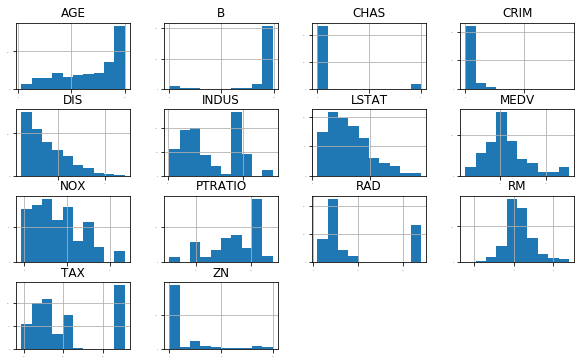

In [130]:
#lets look at the histograms of the data
pyplot.rcParams['figure.figsize'] = (10,6)

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Some attributes may have an exponential distribution, such as CRIM, ZN,
AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX

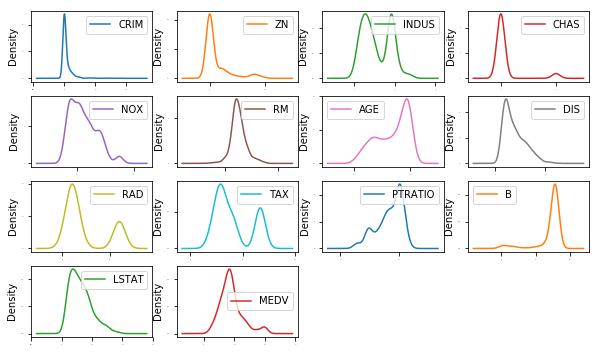

In [131]:
#try smoother density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, legend=True, fontsize=1)
pyplot.show()

Re-iterates possible exponential and bimodal
distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which
might be helpful later with transforms.

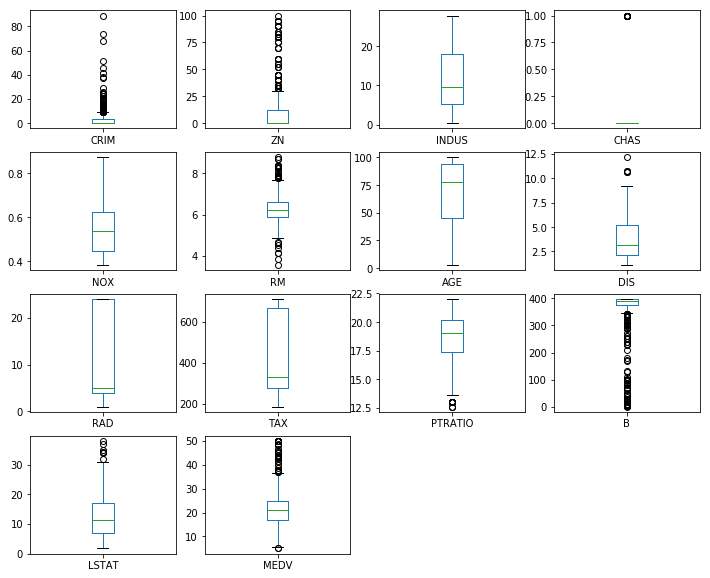

In [132]:
#lets look at the box and whisker plots

pyplot.rcParams['figure.figsize'] = (12,10)
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, legend=True,fontsize=10)
pyplot.show()

Skew in many distributions

### Multimodal 

Try scatter plots between variables

C:\Users\richard\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


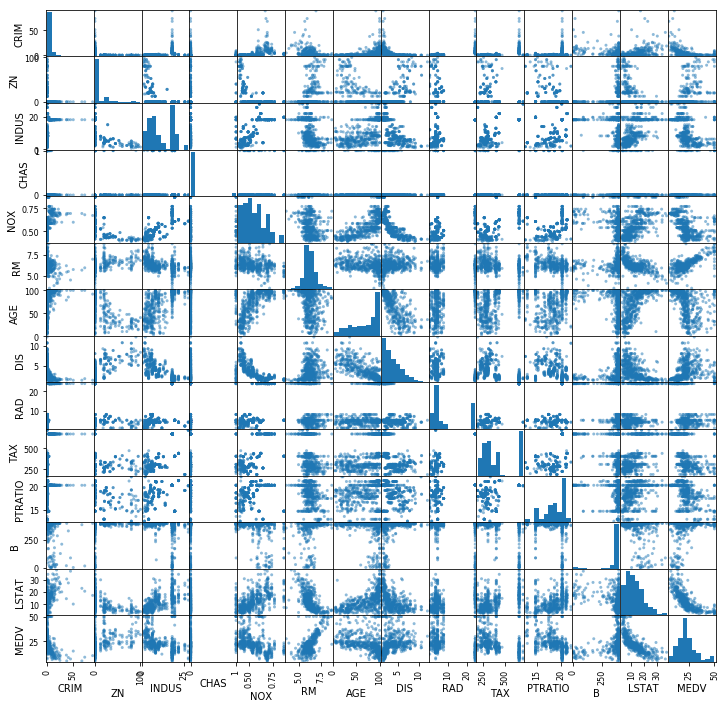

In [133]:
pyplot.rcParams['figure.figsize'] = (12,12)
scatter_matrix(df)
pyplot.show()

The higher correlated attributes do show good structure in their
relationship - Not linear

From data analysis it may be worth trying:
- Feature selection and removing the most correlated attributes.
- Normalizing the dataset to reduce the effect of differing scales.
- Standardizing the dataset to reduce the effects of differing distributions.


### Validation Dataset
Use to confirm accuracy of data later on - use 80/20 split

In [134]:
array = df.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


### Evaluate Algorithms: Baseline
What algos will do well? From data maybe linear regression? Use 10 fold cross validation with mse metric

In [135]:
# test options and evaluation metric
num_folds = 10
num = 7
scoring = 'neg_mean_squared_error'

Create a baseline of performance on this problem and spot-check a number of different
algorithms. Lets try a suite of different algorithms capable of working on this regression
problem.
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).


In [136]:
# spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [137]:
#display mean and std of mse for each algo. 

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{:s} mean: {:f} std: {:f} ".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR mean: -21.400099 std: 9.390450 
LASSO mean: -26.431547 std: 11.655308 
EN mean: -27.504052 std: 12.309801 
KNN mean: -41.896488 std: 13.901688 
CART mean: -27.173870 std: 11.868870 
SVR mean: -85.518342 std: 31.994798 


From figures seems LR has lowest followed by LASSO and CART

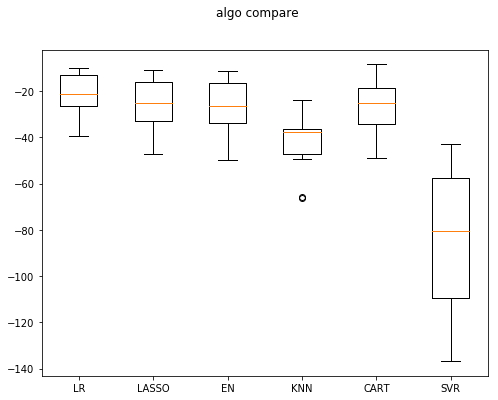

In [138]:
#look at disrto. of scores 
pyplot.rcParams['figure.figsize'] = (8,6)
fig = pyplot.figure()
fig.suptitle('algo compare')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

See similar distributions for the regression algorithms.  Different scales probably affecting scores, maybe more so for SVR and KNN - lets try standardising the data

### Evalute Algorithms: Standardisation
Evaluate the same algorithms with a standardized copy of the
dataset. Data is transformed such that each attribute has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data

In [139]:
#standardise the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))


In [140]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{:s} mean:{:f} std: {:f} ".format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR mean:-21.400099 std: 9.390450 
ScaledLASSO mean:-26.602585 std: 8.972576 
ScaledEN mean:-27.944791 std: 10.570195 
ScaledKNN mean:-20.123490 std: 12.373834 
ScaledCART mean:-24.203756 std: 12.306578 
ScaledSVR mean:-29.660002 std: 16.993025 


Scaling has made big difference esp. as expected on KNN

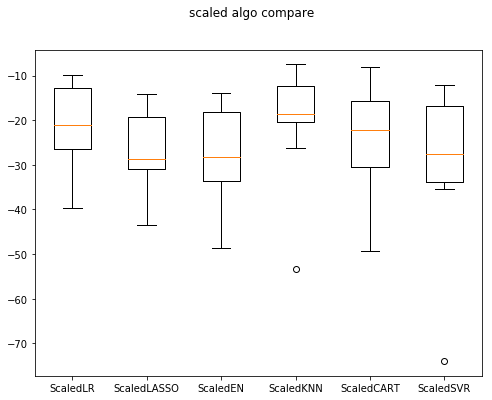

In [141]:
pyplot.rcParams['figure.figsize'] = (8,6)
fig = pyplot.figure()
fig.suptitle('scaled algo compare')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Improve results with tuning
Lets trying messing around with KNN. The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we
can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range
covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross
validation on a standardized copy of the training dataset.

In [142]:
# KNN with algo tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [143]:
print("Best {:f} using {} ".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} {} with: {}".format(mean, stdev, param))

Best -18.133171 using {'n_neighbors': 3} 
-20.373935643564355 15.036687284510023 with: {'n_neighbors': 1}
-18.133171067106705 12.958885755788577 with: {'n_neighbors': 3}
-20.139550495049505 12.199279632263597 with: {'n_neighbors': 5}
-20.560151545766818 12.34813118224879 with: {'n_neighbors': 7}
-20.382691296907467 11.617325642166705 with: {'n_neighbors': 9}
-21.05206447917519 11.621184074905939 with: {'n_neighbors': 11}
-21.157689378405294 11.938415394425938 with: {'n_neighbors': 13}
-21.53865478547855 11.532862756052099 with: {'n_neighbors': 15}
-22.796125252663675 11.605158325796536 with: {'n_neighbors': 17}
-23.88547228545569 11.36244887531873 with: {'n_neighbors': 19}
-24.36498630475292 11.920959432288335 with: {'n_neighbors': 21}


Best k neighbours is 3 with mean square of -18.133

### Ensemble methods

Lets try ensemble methods. Two boosting and two bagging methods:

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

Use the same test harness as before, 10-fold cross validation and pipelines that
standardize the training data for each fold.



In [144]:
#ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.669279 (6.599773)
ScaledGBM: -9.430363 (4.160395)
ScaledRF: -14.257351 (7.195618)
ScaledET: -10.322035 (6.541749)


Generally getting better scores than nonensemble methods

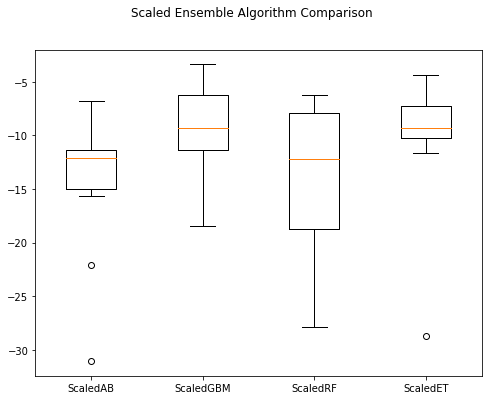

In [145]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Tune Ensemble methods

Gradient boosting now the standard shallow machine learning method - lets try messing around with this.

The default number of boosting stages to perform (n estimators) is 100. This is a good
candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will
look at tuning the number of stages for gradient boosting. Below we define a parameter grid
n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross validation

In [146]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [147]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.061160 using {'n_estimators': 250}
-10.437617 (4.424556) with: {'n_estimators': 50}
-9.574391 (4.145705) with: {'n_estimators': 100}
-9.251591 (3.992446) with: {'n_estimators': 150}
-9.184214 (4.056788) with: {'n_estimators': 200}
-9.061160 (4.003336) with: {'n_estimators': 250}
-9.064721 (4.029519) with: {'n_estimators': 300}
-9.076152 (4.034430) with: {'n_estimators': 350}
-9.132329 (4.085341) with: {'n_estimators': 400}


Best configuration was n estimators=400 resulting in a mean squared
error of -9.06, about 0.65 units better than the untuned method.

### Finalise the model
Finalise gradient boosting model and evaluate it on our hold out
validation dataset. Prepare the model and train it on the entire training dataset.
This includes standardizing the training dataset before training.

In [148]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("Final MSE:%f" % mean_squared_error(Y_validation, predictions))

Final MSE:11.960111


MSE is 11.9, close to our estimate during training